In [ ]:
import numpy as np
from tqdm import tqdm

In [ ]:
class Person:
    birth_rate = 0.2
    death_rate = 0.005
    
    def __init__(self,sex: str = None):
        self.age = 0
        self.live = True
        
        if not sex:
            self.sex = np.random.choice(['male', 'female'])
        else:
            self.sex = sex
            
    def birth(self):
        if self.live and np.random.random() < self.birth_rate and self.age > 18 and self.sex == 'female':
            return Person()
        
    def aging(self):
        if self.live:
            self.age += 1
        
    def death(self):
        if self.live and np.random.random() < self.death_rate:
            self.live = False
        

In [ ]:
class Society:
    
    def __init__(self, start_population: int):
        self.population = []
        for person in range(start_population):
            self.population.append(Person())
    
    def new_year(self):
        new_birth = []
        for person in self.population:
            
            child = person.birth()
            if child:
                new_birth.append(child)
            
            person.aging()
            person.death()
            
        self.population.extend(new_birth)

In [ ]:
soc = Society(1000)
years = range(100)
population = []
deatstock = []
for year in tqdm(years):
    population.append(len([p for p in soc.population if p.live]))
    deatstock.append(len([p for p in soc.population if not p.live]))
    soc.new_year()

100%|██████████| 100/100 [00:01<00:00, 60.20it/s]


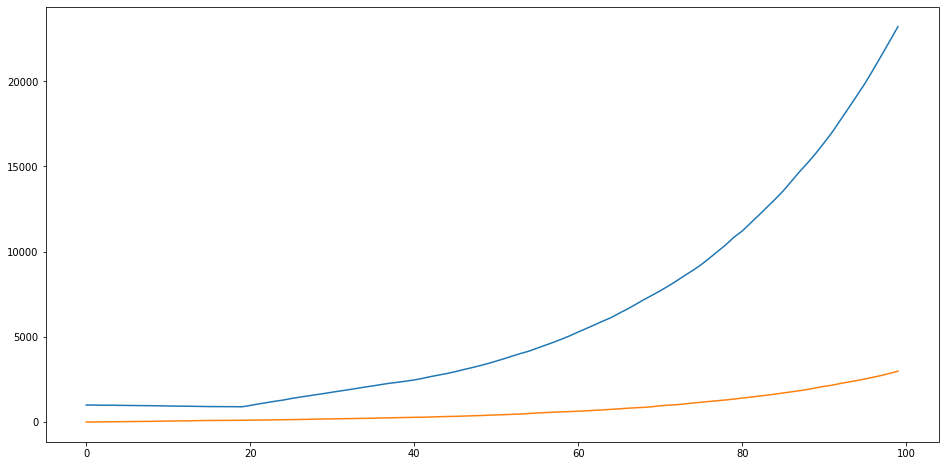

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize = [16,8])
axes.plot(years, population)
axes.plot(years, deatstock)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=978e47b7-a961-4dca-a945-499e8b781a34' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>